Importing Required Libraries and Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df= pd.read_csv('/content/drive/My Drive/data.csv')
df.head()
df.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Making a DataFrame as per the required column needs

In [5]:
df=df[['Name', 'Age','Club','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']]

Selecting three favourite clubs for analysis

In [8]:
clubs=['FC Barcelona', 'Juventus', 'Manchester City']
b= df[df['Club']== clubs[0]]
j= df[df['Club']== clubs[1]]
m= df[df['Club']== clubs[2]]

Creating a column from pre-decided class weights for Attacking

In [ ]:
b['Attacking']= (b['Finishing'] *5 + b['Crossing'] * 2 + b['HeadingAccuracy']* 3)/10
j['Attacking']= (j['Finishing'] *5 + j['Crossing'] * 2 + j['HeadingAccuracy']* 3)/10
m['Attacking']= (m['Finishing'] *5 + m['Crossing'] * 2 + m['HeadingAccuracy']* 3)/10

Creating a column from pre-decided class weights for Defense

In [ ]:
b['Defense']= (b['LongPassing'] *5 + b['Marking'] * 2 + b['StandingTackle']* 3)/10
j['Defense']= (j['LongPassing'] *5 + j['Marking'] * 2 + j['StandingTackle']* 3)/10
m['Defense']= (m['LongPassing'] *5 + m['Marking'] * 2 + m['StandingTackle']* 3)/10

Attacking histogram

Text(0, 0.5, 'Players')

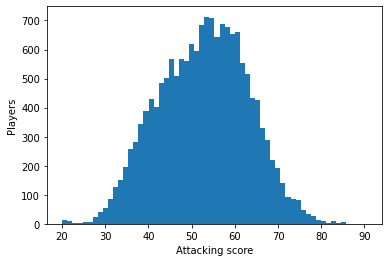

In [115]:
plt.hist(df[df['Attacking']>20]['Attacking'],bins=60)
plt.xlabel('Attacking score')
plt.ylabel('Players')

Defense Histogram

Text(0, 0.5, 'Players')

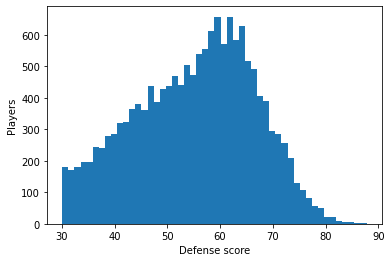

In [119]:
plt.hist(df[df['Defense']>30]['Defense'],bins=50)
plt.xlabel('Defense score')
plt.ylabel('Players')

Gettting required Means and Standard Deviations 

In [193]:
mean_all_def=df['Defense'].mean()
std_all_def=df['Defense'].std()

mean_all_a=df['Attacking'].mean()
std_all_a=df['Attacking'].std()
mean_b_def= b['Defense'].mean()
std_b_def= b['Defense'].std()
mean_b_a= b['Attacking'].mean()
std_b_a= b['Attacking'].std()

mean_j_def= j['Defense'].mean()
std_j_def= j['Defense'].std()
mean_j_a= j['Attacking'].mean()
std_j_a= j['Attacking'].std()

mean_m_def= m['Defense'].mean()
std_m_def= m['Defense'].std()
mean_m_a= m['Attacking'].mean()
std_m_a= m['Attacking'].std()

mean_rc_j=j['Release Clause'].mean()
mean_rc_b=b['Release Clause'].mean()
mean_rc_m=m['Release Clause'].mean()

std_rc_j=j['Release Clause'].std()
std_rc_b=b['Release Clause'].std()
std_rc_m=m['Release Clause'].std()

mean_rc_all=df['Release Clause'].mean()
std_rc_all=df['Release Clause'].std()

The values for top confidence intervals

In [149]:
print('The top 2.5% of attackers have score:      ' + str(mean_all_a + 1.96*std_all_a))
print('The top 5% of attackers have score:      ' + str(mean_all_a + 1.645*std_all_a))

print('The top 2.5% of defenders have score:        ' + str(mean_all_def + 1.96*std_all_def))
print('The top 5% of defenders have score:        ' + str(mean_all_def + 1.645*std_all_def))


The top 2.5% of attackers have score:      79.35036112978332
The top 5% of attackers have score:      74.37808196695025
The top 2.5% of defenders have score:        81.60849884471355
The top 5% of defenders have score:        76.54811116338827


Function for getting list in accordance to confidence scores

In [155]:
def get_names(df1, cls):
  if (cls == 'Attacking'):
    sc0=79.35
    sc1=74.37
  if (cls == 'Defense'):
    sc1=76.548
    sc0=81.60
  names0=[]
  names1=[]
  l= len(df1)
  for i in range(0,l):
    if(df1.iloc[i][cls] > sc0):
      names0.append(df1.iloc[i]['Name'])
    if ((df1.iloc[i][cls] < sc0) & (df1.iloc[i][cls] > sc1)):
      names1.append(df1.iloc[i]['Name'])
  return names0, names1


Getting lists for obtaining top players

In [160]:
barca_lista0, barca_lista1= get_names(b, 'Attacking')
juventus_lista0, juventus_lista1= get_names(j,'Attacking')
mancity_lista0, mancity_lista1= get_names(m, 'Attacking')

barca_listd0, barca_listd1= get_names(b, 'Defense')
juventus_listd0, juventus_listd1= get_names(j,'Defense')
mancity_listd0, mancity_listd1= get_names(m, 'Defense')


Priniting names

In [169]:
print('                     BARCELONA               ')
print(' ')
print(' ')
print('top 2.5% attackers:      ' + str(barca_lista0))
print('top 5% attackers:        ' + str(barca_lista1))
print('top 2.5% defenders:      ' + str(barca_listd0))
print('top 5% defenders:        ' + str(barca_listd1))
print(' ')
print(' ')
print('                     JUVENTUS               ')
print(' ')
print(' ')
print('top 2.5% attackers:      ' + str(juventus_lista0))
print('top 5% attackers:        ' + str(juventus_lista1))
print('top 2.5% defenders:      ' + str(juventus_listd0))
print('top 5% defenders:        ' + str(juventus_listd1))
print(' ')
print(' ')
print('                     MAN_CITY               ')
print(' ')
print(' ')
print('top 2.5% attackers       ' + str(mancity_lista0))
print('top 5% attackers:        ' + str(mancity_lista1))
print('top 2.5% defenders:      ' + str(mancity_listd0))
print('top 5% defenders:        ' + str(mancity_listd1))


                     BARCELONA               
 
 
top 2.5% attackers:      ['L. Messi', 'L. Suárez']
top 5% attackers:        ['Jordi Alba', 'I. Rakitić', 'A. Vidal', 'Munir']
top 2.5% defenders:      ['Sergio Busquets', 'Piqué', 'A. Vidal']
top 5% defenders:        ['S. Umtiti', 'Jordi Alba', 'Sergi Roberto', 'T. Vermaelen']
 
 
                     JUVENTUS               
 
 
top 2.5% attackers:      ['Cristiano Ronaldo', 'M. Mandžukić']
top 5% attackers:        ['P. Dybala']
top 2.5% defenders:      ['L. Bonucci', 'S. Khedira']
top 5% defenders:        ['Alex Sandro', 'M. Pjanić', 'B. Matuidi', 'A. Barzagli', 'João Cancelo', 'E. Can']
 
 
                     MAN_CITY               
 
 
top 2.5% attackers       ['S. Agüero']
top 5% attackers:        ['K. De Bruyne', 'L. Sané', 'Gabriel Jesus']
top 2.5% defenders:      ['Fernandinho', 'A. Laporte']
top 5% defenders:        ['N. Otamendi', 'J. Stones', 'F. Delph']


Type casting and altering the release clause in accordance to the currencies

In [190]:
def clr_clause(x):
    if(type(x)== str):
      if(x[-1]=='M' ):
        return float(x[1:-1])
      if(x[-1]=='K'):
        return float(x[1:-1])/1000

Calling function for updating Release Clause

In [191]:
df['Release Clause']=df['Release Clause'].apply(clr_clause)
b['Release Clause']=b['Release Clause'].apply(clr_clause)
j['Release Clause']=j['Release Clause'].apply(clr_clause)
m['Release Clause']=m['Release Clause'].apply(clr_clause)

Printing the average value of Release Clause

In [206]:
print('               Release Clause        ')
print(' ')
print('Average player clause in millions:                '+ str(df['Release Clause'].sum()/len(df)))
print('Average player clause in millions Barca:          '+ str(b['Release Clause'].sum()/len(b)))
print('Average player clause in millions Juventus:       '+ str(j['Release Clause'].sum()/len(j)))
print('Average player clause in millions Man City:       '+ str(m['Release Clause'].sum()/len(m)))

               Release Clause        
 
Average player clause in millions:                4.191199538638985
Average player clause in millions Barca:          54.939393939393945
Average player clause in millions Juventus:       47.744
Average player clause in millions Man City:       45.84566666666667
